# Simple transformations with image arrays

Let's consider some simple transformations we might want to apply to our data inside image arrays. By image arrays, I mean
any array that has a shape of (height, width, channels).

In this document, we will explore the following transformations:
- **Scaling**: we can scale the data by a constant factor, or to fit a range.
- **Rotations**: we can rotate the data by a given angle.
- **Translation**: we can translate the data by a given offset.
- **Rolling**: we can roll the data by a given offset.
- **Shear**: we can shear the data by a given angle.
- **Reflection**: we can reflect the data by a given angle, or by a given axis.
- **Cropping**: we can crop the data to a range of indices.
- **Blitting**: we can blit the data from a source array to a destination array.

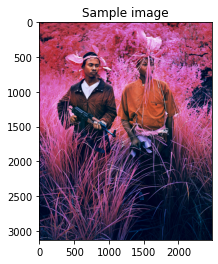

In [1]:
from media_tools import *
import cv2

sample_media = "C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/"
image = image_tools.read_image(sample_media + "Mosse_2012_Hot_Rats.jpg")
image_tools.show_image(image, axis=True, title="Sample image", scale_ratio=1)

## Scaling 2d arrays:

You can scale 2d arrays along their axes using the `rescale_2d_array()` function, or using the `rescale_2d_array_by_factor()`
function of the `data_tools` module.

The `media_tools` package uses openCV to scale 2d arrays, and it offers a few interpolation methods for scaling:
- `cv2.INTER_NEAREST`: nearest neighbor interpolation (data is not smoothed)
- `cv2.INTER_LINEAR`: bilinear interpolation (best for scaling up)
- `cv2.INTER_AREA`: resampling using pixel area relation. (best for scaling down)
- `cv2.INTER_CUBIC`: bicubic interpolation (best for scaling up)
- `cv2.INTER_LANCZOS4`: Lanczos interpolation over 8x8 neighborhood

**Example 2d array rescalings:**

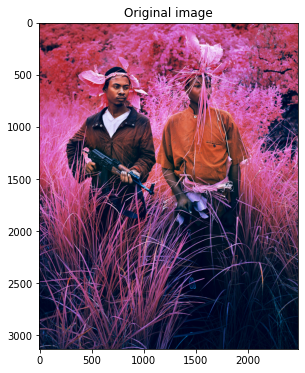

In [8]:
# show the original image
image_tools.show_image(image, axis=True, title="Original image", scale_ratio=1.5)

1. Array scaled up by a factor of 2 using `rescale_2d_array_by_factor()` from the `data_tools` module. This function can
be used to scale arrays along any axis/axes of an array by any positive `factor`, a `double`. The user's original axis
selection is passed to the function through the `axes` argument.

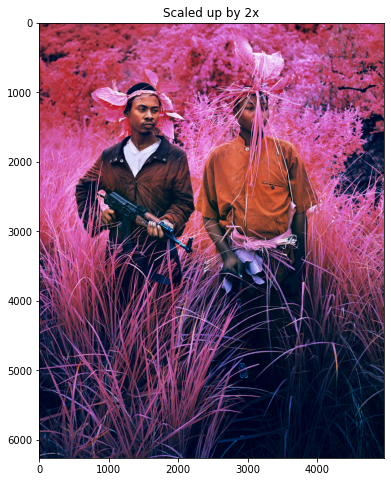

In [9]:
# array scaled up 2x
array_scaled_up_2x = data_tools.rescale_2d_array_by_factor(image, 2, axes=(0, 1))
image_tools.show_image(array_scaled_up_2x, axis=True, title="Scaled up by 2x")

2. Array rescaled to fill a square of size 50x50 using `rescale_2d_array()` from the `data_tools` module. This function
can be used to scale 2d arrays along their axes to fill new arrays of any size containing the same number of dimensions.
The `new_dimensions` argument is a tuple of integers, and it is used to specify the new dimensions of the array.

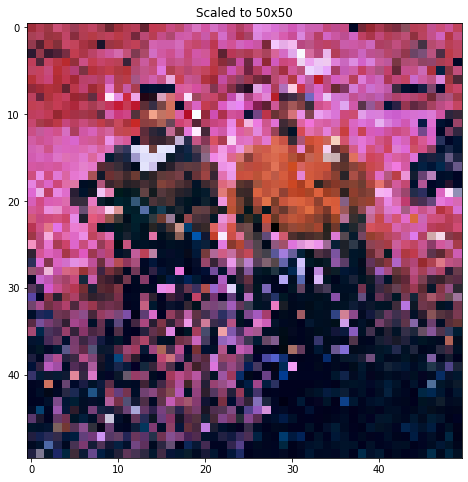

In [10]:
# array scaled to a range of 50x50 square
array_scaled_to_50x50 = data_tools.rescale_2d_array(image, (50, 50))
image_tools.show_image(array_scaled_to_50x50, axis=True, title="Scaled to 50x50")

3. Examples of the different interpolation methods using a chessboard image as reference:

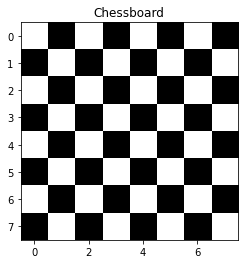

In [11]:
import numpy as np

# create a sample chessboard image
chessboard = np.zeros((8, 8, 3), dtype=np.uint8)
# fill in the chess board pattern
chessboard[::2, ::2] = chessboard[1::2, 1::2] = (255, 255, 255)

image_tools.show_image(chessboard, axis=True, title="Chessboard", scale_ratio=1)

Interpolation methods applied to an array for dowscaling/downsampling:

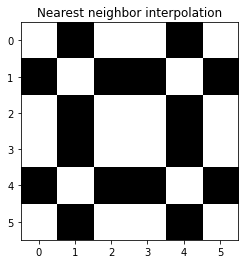

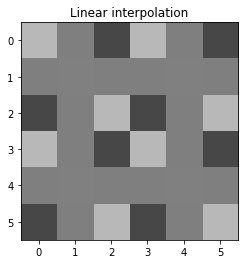

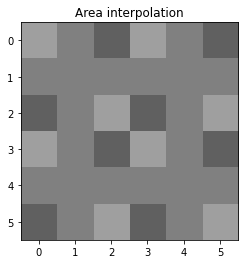

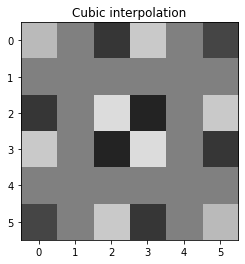

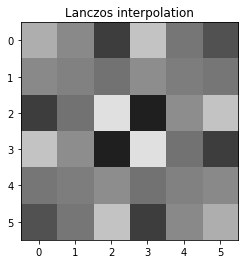

In [12]:
# rescale by a factor of 0.8 and apply different interpolation methods
chessboard_rescaled_nearest = data_tools.rescale_2d_array_by_factor(chessboard, 0.8, interpolation=cv2.INTER_NEAREST)
chessboard_rescaled_linear = data_tools.rescale_2d_array_by_factor(chessboard, 0.8, interpolation=cv2.INTER_LINEAR)
chessboard_rescaled_area = data_tools.rescale_2d_array_by_factor(chessboard, 0.8, interpolation=cv2.INTER_AREA)
chessboard_rescaled_cubic = data_tools.rescale_2d_array_by_factor(chessboard, 0.8, interpolation=cv2.INTER_CUBIC)
chessboard_rescaled_lanczos = data_tools.rescale_2d_array_by_factor(chessboard, 0.8, interpolation=cv2.INTER_LANCZOS4)

# show the rescaled images
image_tools.show_image(chessboard_rescaled_nearest, axis=True, title="Nearest neighbor interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_linear, axis=True, title="Linear interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_area, axis=True, title="Area interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_cubic, axis=True, title="Cubic interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_lanczos, axis=True, title="Lanczos interpolation", scale_ratio=1)

Interpolation methods applied to an array for upscaling/upsampling:

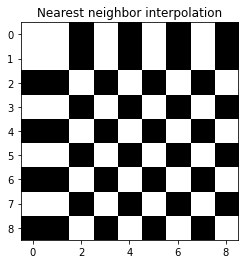

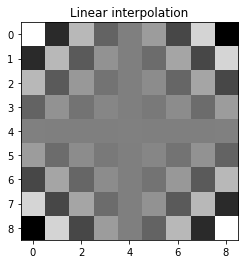

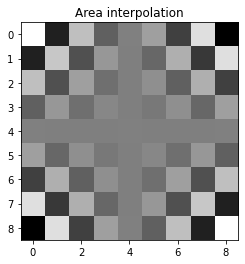

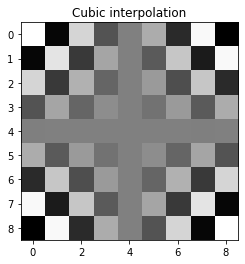

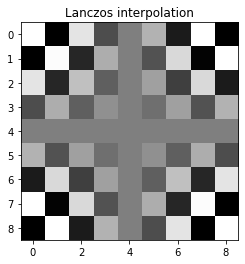

In [13]:
# rescale by a factor of 1.2 and apply different interpolation methods
chessboard_rescaled_nearest = data_tools.rescale_2d_array_by_factor(chessboard, 1.2, interpolation=cv2.INTER_NEAREST)
chessboard_rescaled_linear = data_tools.rescale_2d_array_by_factor(chessboard, 1.2, interpolation=cv2.INTER_LINEAR)
chessboard_rescaled_area = data_tools.rescale_2d_array_by_factor(chessboard, 1.2, interpolation=cv2.INTER_AREA)
chessboard_rescaled_cubic = data_tools.rescale_2d_array_by_factor(chessboard, 1.2, interpolation=cv2.INTER_CUBIC)
chessboard_rescaled_lanczos = data_tools.rescale_2d_array_by_factor(chessboard, 1.2, interpolation=cv2.INTER_LANCZOS4)

# show the rescaled images
image_tools.show_image(chessboard_rescaled_nearest, axis=True, title="Nearest neighbor interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_linear, axis=True, title="Linear interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_area, axis=True, title="Area interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_cubic, axis=True, title="Cubic interpolation", scale_ratio=1)
image_tools.show_image(chessboard_rescaled_lanczos, axis=True, title="Lanczos interpolation", scale_ratio=1)

## Rotating 2d arrays:

You can rotate 2d arrays around a point using the `data_tools.rotate_2d_array_around_point()` function.

The function will allow you to rotate an array around a given point, for a given angle. The `angle` parameter is in degrees.
The `bound` parameter is a boolean that determines whether the rotated array should be cropped to the original array size, or
if it should be padded with zeros, or an arrangement or values that are similar to the original array. The `border_type` parameter is a string that determines how the border
is handled. The `border_type` parameter can be one of the following:

- `cv2.BORDER_CONSTANT`: the border is filled with a constant value.
- `cv2.BORDER_REPLICATE`: the border is filled with the values of the nearest array elements.
- `cv2.BORDER_REFLECT`: the array is tiled with the reflection of the border.
- `cv2.BORDER_WRAP`: the border is filled with the values of the opposite array elements.
- `cv2.BORDER_REFLECT_101`: the border is filled with the values of the nearest array elements.

The `border_value` parameter is a value that will be used to fill the border, if the `border_type` is `cv2.BORDER_CONSTANT`.

For more information about cv2.border types, please follow [this link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)

**Example array rotations:**

1. Rotation with preserved array size:

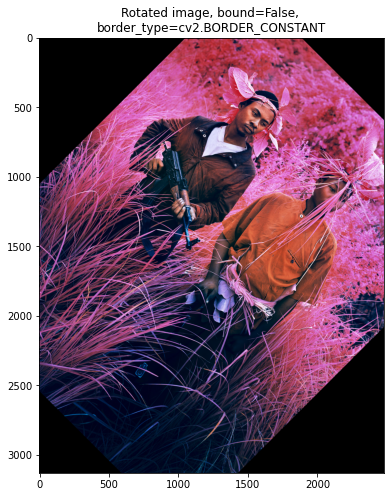

In [14]:
# rotate the image by 45 degrees, but crop the image to the original size:
img_rotated = image_tools.rotate_image(image, angle=45, bound=False, border_type=cv2.BORDER_CONSTANT, border_value=(0, 0, 0))
image_tools.show_image(img_rotated, axis=True, title="Rotated image, bound=False, \nborder_type=cv2.BORDER_CONSTANT")

2. Rotation with preserved array data:

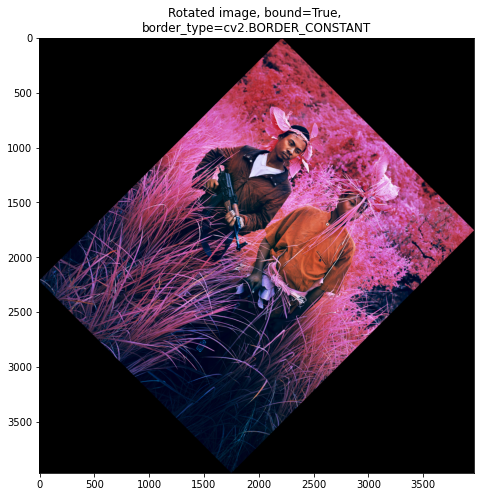

In [15]:
# rotate the image by 45 degrees without losing any part of the image:
img_rotated = image_tools.rotate_image(image, angle=45, bound=True, border_type=cv2.BORDER_CONSTANT, border_value=(0, 0, 0))
image_tools.show_image(img_rotated, axis=True, title="Rotated image, bound=True, \nborder_type=cv2.BORDER_CONSTANT")

You might like to fill the borders of the image created by the rotation with a constant value, or with an arrangement of the
original image data. The `media_tools` library implements openCV and its border types to enable this functionality. Borders
can be applied either to the padded rotated image, or to the unpadded rotated image.

3. Examples of rotations with preserved array data and different border types:

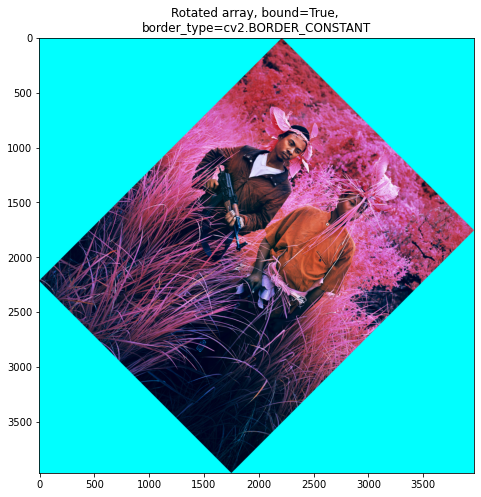

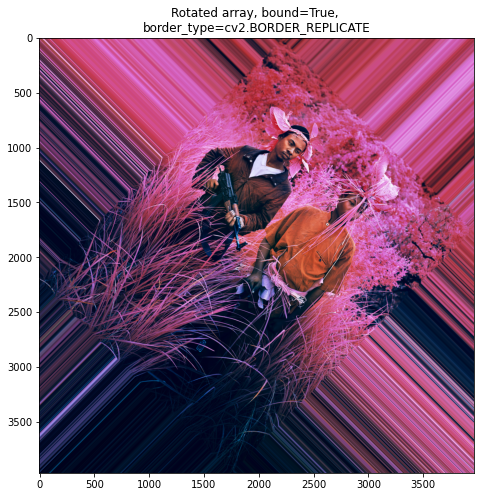

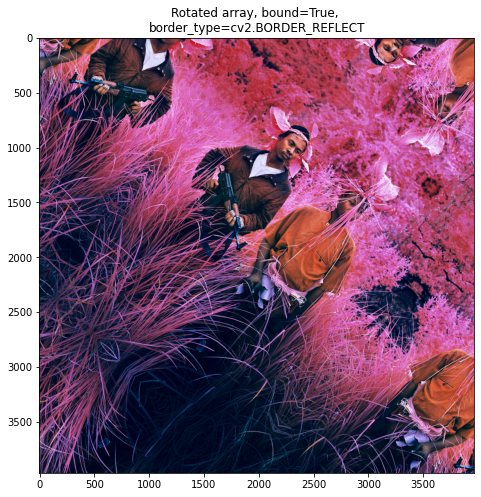

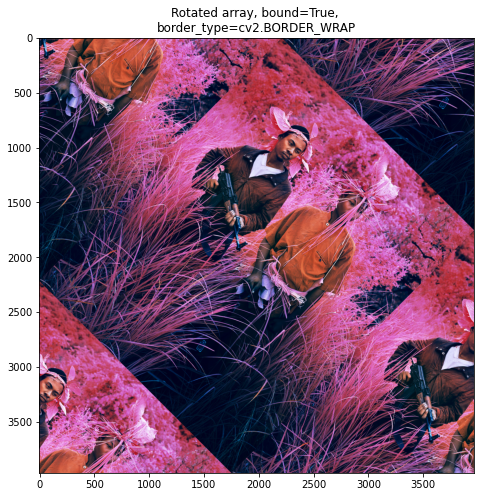

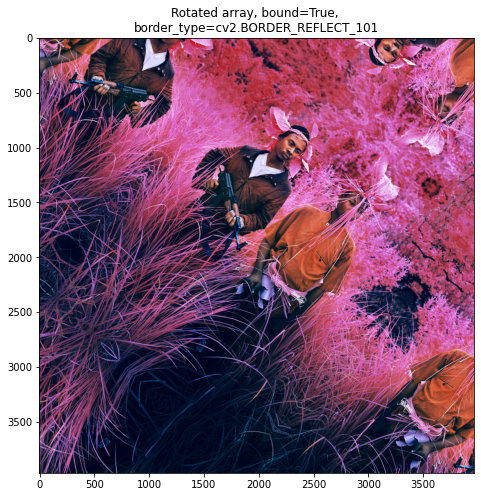

In [16]:
array_rotated_constant = data_tools.rotate_2d_array_around_point(image, angle=45, bound=True, border_type=cv2.BORDER_CONSTANT, border_value=(0, 255, 255))
array_rotated_replicate = data_tools.rotate_2d_array_around_point(image, angle=45, bound=True, border_type=cv2.BORDER_REPLICATE)
array_rotated_reflect = data_tools.rotate_2d_array_around_point(image, angle=45, bound=True, border_type=cv2.BORDER_REFLECT)
array_rotated_wrap = data_tools.rotate_2d_array_around_point(image, angle=45, bound=True, border_type=cv2.BORDER_WRAP)
array_rotated_reflect_101 = data_tools.rotate_2d_array_around_point(image, angle=45, bound=True, border_type=cv2.BORDER_REFLECT_101)

image_tools.show_image(array_rotated_constant, axis=True, title="Rotated array, bound=True, \nborder_type=cv2.BORDER_CONSTANT")
image_tools.show_image(array_rotated_replicate, axis=True, title="Rotated array, bound=True, \nborder_type=cv2.BORDER_REPLICATE")
image_tools.show_image(array_rotated_reflect, axis=True, title="Rotated array, bound=True, \nborder_type=cv2.BORDER_REFLECT")
image_tools.show_image(array_rotated_wrap, axis=True, title="Rotated array, bound=True, \nborder_type=cv2.BORDER_WRAP")
image_tools.show_image(array_rotated_reflect_101, axis=True, title="Rotated array, bound=True, \nborder_type=cv2.BORDER_REFLECT_101")

## Translating 2d arrays:

You can translate a 2d array by a given amount along the axes of the array. The `translate_2d_array_around_point()` function
from the `data_tools` module is used to perform this operation.

Like the `rotate_2d_array_around_point()` function, the `translate_2d_array_around_point()` function accepts openCV border
types, specified by the `border_type` parameter.

See the [openCV documentation](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html)
for more information about border types, or consult the **Rotating 2d arrays** section of this document.

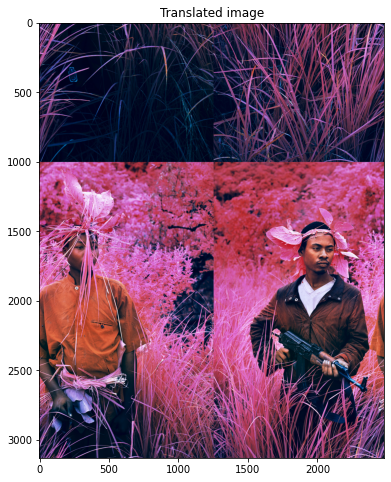

In [17]:
# every translation can be described as a combination of translations along the axes of an array.
# example 2d array translation:
image_translated = data_tools.translate_2d_array(image, 1255, 1000, border_type=cv2.BORDER_WRAP, border_value=(0, 0, 0))
image_tools.show_image(image_translated, axis=True, title="Translated image")

## Rolling arrays:

Rolling arrays along one or multiple axes essentially means that the array is shifted along one or multiple axes.

You can roll an array along one or multiple axes by a given amount using the `roll_array()` function from the `data_tools`
module.

**Example array rollings:**

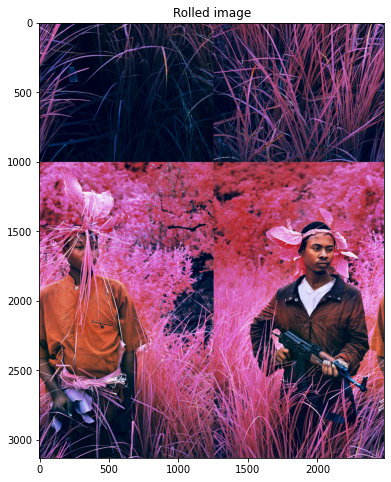

In [18]:
# we can use data_tools.roll_array() to shift the array along the axes.
image_translated = data_tools.roll_array(image, (1255, 1000), axes=(1, 0))
image_tools.show_image(image_translated, axis=True, title="Rolled image")

Rolling image arrays along their third axis is equivalent to shifting the image colour channels.

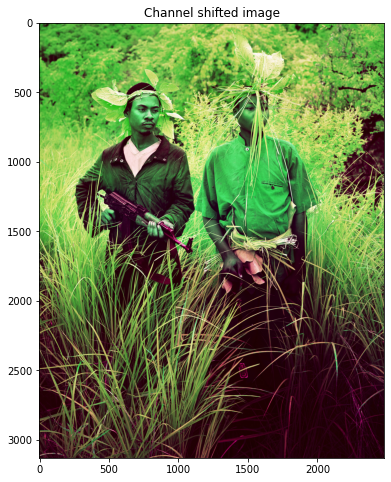

In [19]:
# in addition, we can shift the channels of an image by a given offset by shifting axis 2, the third axis of the array.
image_channel_shifted = data_tools.roll_array(image, 1, axes=2)
image_tools.show_image(image_channel_shifted, axis=True, title="Channel shifted image")

Translating along the third axis of an array is equivalent to shifting the channels of an image.

## Shearing 2d arrays:

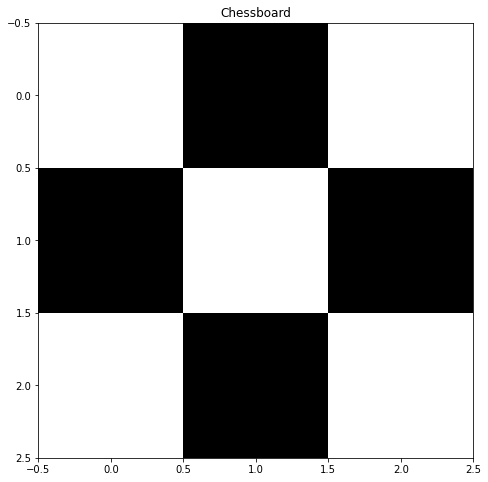

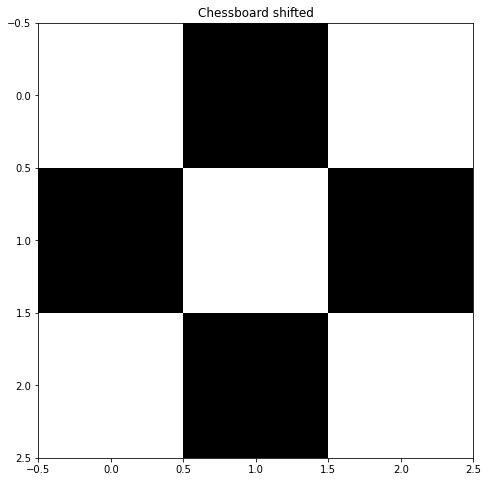

In [20]:
import numpy as np
# create a sample chessboard image
chessboard = np.zeros((3, 3, 3), dtype=np.uint8)
# fill in the chess board pattern
chessboard[::2, ::2] = chessboard[1::2, 1::2] = (255, 255, 255)
# add a blue square in the middle of the chessboard
chessboard[3:5, 3:5] = (0, 255, 255)
# show the chessboard
image_tools.show_image(chessboard, axis=True, title="Chessboard")

# shift every row on the chessboard by the index of the row multiplied by a given amount

def staircase_shift(array, factor, axis=0):
    """
    Shifts every row of an array by the index of the row multiplied by a given amount, (multiplied by 3 to conserve pixels).
    row 1 gets shifted by 1 * factor, row 2 by 2 * factor, etc.
    """
    for i in range(array.shape[axis]):
        array = data_tools.roll_array(array, i * factor * 3, axes=(axis,))
    return array

chessboard_shifted = staircase_shift(chessboard, 2)
image_tools.show_image(chessboard_shifted, axis=True, title="Chessboard shifted")

## Venetian blinds selection:

In [21]:
# fill every other n elements of the array along an axis with blue using numpy
venetian_blinds = np.zeros((8, 8, 3), dtype=np.uint8)
venetian_blinds[::2, ::2] = venetian_blinds[1::2, 1::2] = (255, 255, 255)
venetian_blinds[::2, ::2] = (0, 0, 255)
# image_tools.show_image(venetian_blinds, axis=True, title="Venetian blinds")

def venetian_blinds(array, fill_value, step_size=5, select=3 ,axis=0):
    # fill 3 rows every 5 rows with blue
    array = np.select([array[::step_size, ::step_size, select] == fill_value], [array[::step_size, ::step_size, select]], default=array)
    return array


venetian_blinds_filled = venetian_blinds(chessboard, (0, 0, 255), step_size=6)
image_tools.show_image(venetian_blinds_filled, axis=True, title="Filled venetian blinds")


IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
# shift the rows of the chessboard in alternating directions by a given amount
def shear_2d_array(array, shear_amount):
    shear_matrix = np.array([[1, shear_amount, 0], [0, 1, 0]])
    return cv2.warpAffine(array, shear_matrix, (array.shape[1], array.shape[0]))

sheared_chessboard = shear_2d_array(chessboard, shear_amount=0.99)
image_tools.show_image(sheared_chessboard, axis=True, title="Sheared chessboard")

In [ ]:
shear_amount = 0.99
shear_matrix = np.array([[1, shear_amount, 0], [0, 1, 0]])
shear_image = cv2.warpAffine(chessboard, shear_matrix, (chessboard.shape[1], chessboard.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0), flags=cv2.INTER_NEAREST)
image_tools.show_image(shear_image, axis=True, title="Sheared image")

## Reflection

You can reflect an image along one of its axes by using the `cv2.flip` function.

In [ ]:
# show the start image
image_tools.show_image(image, axis=True, title="Original image", scale_ratio=1)

# get image reflection along the x-axis
image_reflected = np.flip(image, axis=1)
image_tools.show_image(image_reflected, axis=True, title="Reflected image along x-axis", scale_ratio=1)

# get image reflection along the y-axis
image_reflected = np.flip(image, axis=0)
image_tools.show_image(image_reflected, axis=True, title="Reflected image along y-axis", scale_ratio=1)

# get image reflection along both axes
image_reflected = np.flip(image, axis=(0, 1))
image_tools.show_image(image_reflected, axis=True, title="Reflected image along both axes", scale_ratio=1)

# get image reflection along 3rd axis
image_reflected = np.flip(image, axis=2)
image_tools.show_image(image_reflected, axis=True, title="Reflected image along 3rd axis", scale_ratio=1)

## Cropping

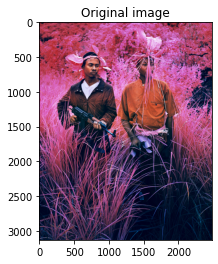

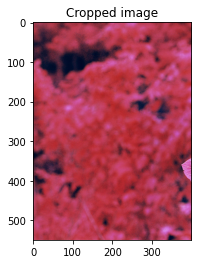

In [6]:
image = image_tools.read_image(sample_media + "Mosse_2012_Hot_Rats.jpg")

# crop an image to a range described by the top left and bottom right corners
def crop_image(image, top_left, bottom_right):
    return image[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]]

# show the start image
image_tools.show_image(image, axis=True, title="Original image", scale_ratio=1)

# get image crop
image_cropped = crop_image(image, top_left=(150, 0), bottom_right=(350*2, 200*2))
image_tools.show_image(image_cropped, axis=True, title="Cropped image", scale_ratio=1)

## Blitting

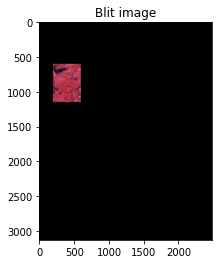

In [7]:
img_source = image_cropped
img_dest = image
displacement = (200, 600)

img_blit = data_tools.blit(img_source, img_dest, *displacement)
image_tools.show_image(img_blit, axis=True, title="Blit image", scale_ratio=1)